In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import libpysal as ps
import matplotlib.pyplot as plt
import seaborn as sns
from pysal.lib import weights
from pysal.model import spreg
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
from esda.moran import Moran_Local
from splot.esda import lisa_cluster
from pysal.lib import weights
from splot.libpysal import plot_spatial_weights
from spreg import OLS
from spreg import MoranRes
from spreg import ML_Lag
from spreg import ML_Error

/shared-libs/python3.10/py/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
#Load the data
gdf = gpd.read_file('/work/Final data/gdf_model.shp')

## Weight matrices & LISA

/root/venv/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
 There are 9 islands with ids: 12, 16, 37, 48, 72, 116, 249, 278, 279.
  warnings.warn(message)


Text(0.5, 1.0, 'Spatial weights Contiguity')

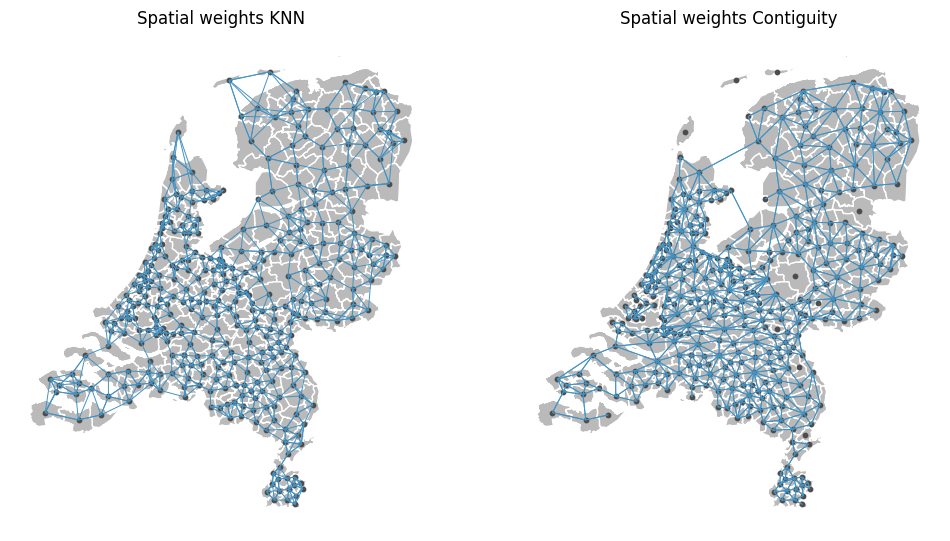

In [3]:
w_knn = weights.KNN.from_dataframe(gdf, k=4)
w_queen = weights.contiguity.Queen.from_dataframe(gdf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
plot_spatial_weights(w_knn, gdf, ax=ax1)
plot_spatial_weights(w_queen, gdf, ax=ax2);
ax1.set_title('Spatial weights KNN')
ax2.set_title('Spatial weights Contiguity')


('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 116, ' is an island (no neighbors)')
('WARNING: ', 249, ' is an island (no neighbors)')
('WARNING: ', 278, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
/root/venv/lib/python3.10/site-packages/esda/moran.py:1057: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


Text(0.5, 1.0, 'Lisa clusters Queen weights')

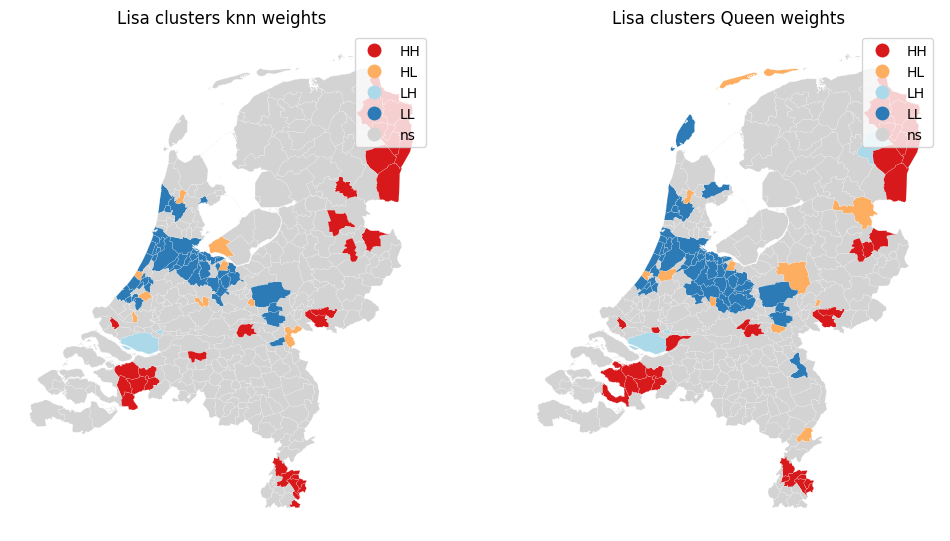

In [5]:
lisa_knn = Moran_Local(gdf["Overweight"], w_knn)
lisa_queen = Moran_Local(gdf["Overweight"], w_queen)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
lisa_cluster(lisa_knn, gdf, p=0.05, ax=ax1)
lisa_cluster(lisa_queen, gdf, p=0.05, ax=ax2)
ax1.set_title('Lisa clusters knn weights')
ax2.set_title('Lisa clusters Queen weights')

## Set preparation variables

In [6]:
y_name = 'Overweight'
y = gdf[y_name].values

x_names = ['Experience', 'OneOrMoreP', 'Smokers', 'ExcessiveD', 'DistanceTo', 'Distance_1',
       'Distance_2', 'DSWithin20', 'Distance_3', 'CafeWithin', 'Distance_4',
        'Distance_5', 'Distance_6', 'Distance_7', 'Distance_8',
       'Population', 'DensityPer', 'CarsPer100', 'Greenindic']
x = np.array(gdf[x_names])

## OLS

In [ ]:
ols = OLS(y = y, x = x, w = w_knn, name_y=y_name, name_x = x_names, 
        name_w="w_knn", name_ds='gdf', 
        white_test=True, spat_diag=True, moran=True)
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :         gdf
Weights matrix      :       w_knn
Dependent Variable  :  Overweight                Number of Observations:         353
Mean dependent var  :     50.9224                Number of Variables   :          20
S.D. dependent var  :      4.7726                Degrees of Freedom    :         333
R-squared           :      0.5922
Adjusted R-squared  :      0.5689
Sum squared residual:    3270.012                F-statistic           :     25.4469
Sigma-square        :       9.820                Prob(F-statistic)     :   1.371e-53
S.E. of regression  :       3.134                Log likelihood        :    -893.789
Sigma-square ML     :       9.263                Akaike info criterion :    1827.577
S.E of regression ML:      3.0436                Schwarz criterion     :    1904.906

-----------------------------------------------------------------------------

This output presents the results of an Ordinary Least Squares (OLS) regression analysis. The dependent variable is "Overweight" and the dataset has 353 observations. The model has 20 variables, including the constant term. The R-squared value is 0.5922, indicating that the model explains about 59.22% of the variation in the dependent variable. The adjusted R-squared is 0.5689, which accounts for the number of predictors in the model. The F-statistic is 25.4469 with a very low probability (1.371e-53), indicating that the model is statistically significant.

The table of coefficients, standard errors, t-statistics, and probabilities shows the individual contribution of each variable to the model. A low probability (usually less than 0.05) indicates that a variable is statistically significant. In this model, the significant variables are Experience, OneOrMoreP, Smokers, ExcessiveD, CafeWithin, Distance_5, and Distance_6.

The diagnostics section provides additional tests and measures to assess the quality of the model:

Multicollinearity Condition Number: 256.745, which is relatively high and could indicate multicollinearity issues among the independent variables.
Jarque-Bera test: A test for normality of errors. With a probability of 0.6698, we fail to reject the null hypothesis, which means the errors are normally distributed.
Breusch-Pagan test and Koenker-Bassett test: Both tests assess heteroskedasticity. With probabilities of 0.2978 and 0.2252, there is no evidence of heteroskedasticity in the model.
Specification Robust Test: Not computed due to multicollinearity.
Diagnostics for Spatial Dependence: These tests check for spatial autocorrelation. The low probability values for Moran's I (error), Lagrange Multiplier (lag), Robust LM (lag), Lagrange Multiplier (error), and Lagrange Multiplier (SARMA) tests indicate that there is significant spatial dependence in the model.
In summary, the OLS model explains about 59.22% of the variation in the dependent variable "Overweight." However, there are indications of multicollinearity and spatial dependence, which could affect the interpretation of the results.

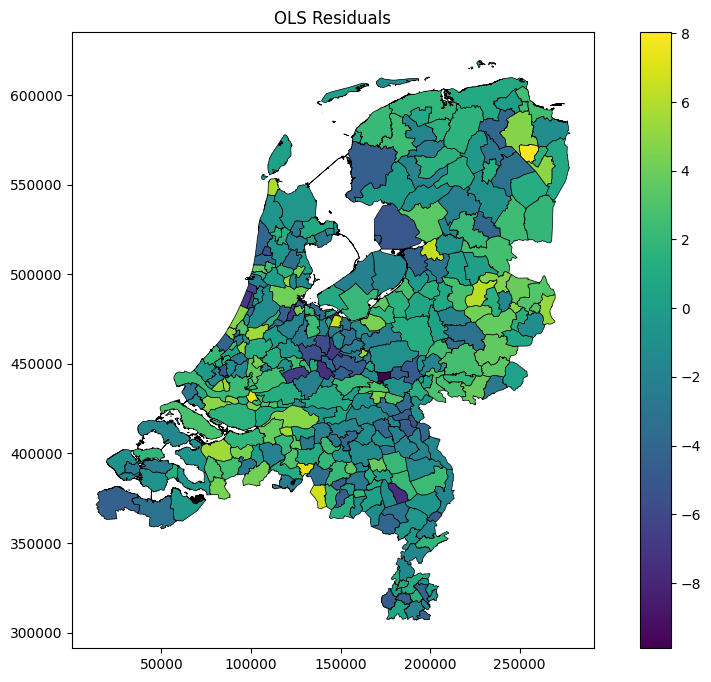

In [ ]:
gdf['ols_res'] = ols.u

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='ols_res', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5)
ax.set_title('OLS Residuals')
plt.show()

Since the Robust LM (lag) test has a lower p-value (0.0004) than the Robust LM (error) test (0.4087), a spatial lag model would be more appropriate for this dataset. The spatial lag model accounts for the spatial dependence in the dependent variable itself, whereas the spatial error model accounts for the spatial dependence in the error term. In this case, the results suggest that the spatial dependence is primarily in the dependent variable, making the spatial lag model the better choice.

## SEM

In [ ]:
sem = ML_Error(y=y, x=x, w=w_knn, 
          name_y=y_name, name_x = x_names, name_w="w_knn", name_ds='gdf')
print(sem.summary)

/shared-libs/python3.10/py/lib/python3.10/site-packages/scipy/optimize/_minimize.py:870: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :         gdf
Weights matrix      :       w_knn
Dependent Variable  :  Overweight                Number of Observations:         353
Mean dependent var  :     50.9224                Number of Variables   :          20
S.D. dependent var  :      4.7726                Degrees of Freedom    :         333
Pseudo R-squared    :      0.5804
Sigma-square ML     :       8.184                Log likelihood        :    -878.736
S.E of regression   :       2.861                Akaike info criterion :    1797.472
                                                

This output presents the results of a Maximum Likelihood Spatial Error Model (ML-SEM). The dependent variable is "Overweight" and the dataset has 353 observations. The model has 20 variables, including the constant term. The Pseudo R-squared value is 0.5804, indicating that the model explains about 58.04% of the variation in the dependent variable.

The table of coefficients, standard errors, z-statistics, and probabilities shows the individual contribution of each variable to the model. A low probability (usually less than 0.05) indicates that a variable is statistically significant. In this model, the significant variables are Experience, OneOrMoreP, Smokers, ExcessiveD, CafeWithin, and Distance_5.

In addition, there is a spatial autoregressive coefficient (lambda) included in the model, with a coefficient of 0.4107834 and a probability of 0.0000000. This indicates that there is significant spatial autocorrelation in the error term, which the spatial error model accounts for.

In summary, the ML-SEM explains about 58.04% of the variation in the dependent variable "Overweight" and accounts for spatial autocorrelation in the error term. The significant variables are Experience, OneOrMoreP, Smokers, ExcessiveD, CafeWithin, and Distance_5. Compared to the Ordinary Least Squares (OLS) model, the ML-SEM provides a more accurate representation of the spatial relationships in the data, as it takes into account the spatial autocorrelation present in the error term.

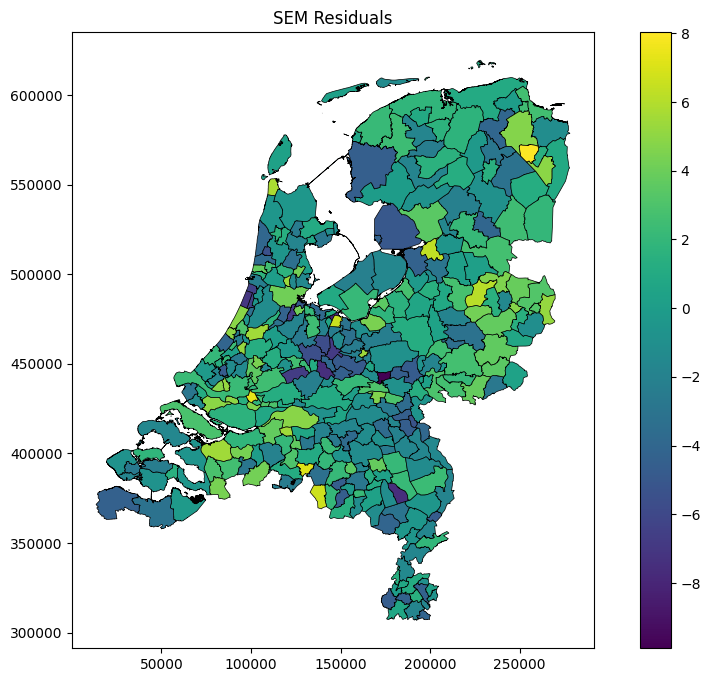

In [ ]:
gdf['sem_res'] = ols.u

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='sem_res', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5)
ax.set_title('SEM Residuals')
plt.show()

## SLM

In [ ]:
slm = ML_Lag(y=y, x=x, w=w_knn, 
          name_y=y_name, name_x = x_names, name_w="w_knn", name_ds='gdf')
print(slm.summary)

/shared-libs/python3.10/py/lib/python3.10/site-packages/scipy/optimize/_minimize.py:870: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :         gdf
Weights matrix      :       w_knn
Dependent Variable  :  Overweight                Number of Observations:         353
Mean dependent var  :     50.9224                Number of Variables   :          21
S.D. dependent var  :      4.7726                Degrees of Freedom    :         332
Pseudo R-squared    :      0.6370
Spatial Pseudo R-squared:  0.6042
Sigma-square ML     :       8.246                Log likelihood        :    -876.799
S.E of regression   :       2.872                Akaike info criterion :    1795.599
                  

This output presents the results of a Maximum Likelihood Spatial Lag Model (ML-SLM). The dependent variable is "Overweight" and the dataset has 353 observations. The model has 21 variables, including the constant term. The Pseudo R-squared value is 0.6370, and the Spatial Pseudo R-squared value is 0.6042. These values suggest that the model explains about 63.70% and 60.42% of the variation in the dependent variable, respectively.

The table of coefficients, standard errors, z-statistics, and probabilities shows the individual contribution of each variable to the model. A low probability (usually less than 0.05) indicates that a variable is statistically significant. In this model, the significant variables are Experience, OneOrMoreP, Smokers, CafeWithin, Distance_5, and Distance_6.

In addition, there is a spatial lag variable (W_Overweight) included in the model, with a coefficient of 0.3030838 and a probability of 0.0000000. This indicates that there is significant spatial autocorrelation in the dependent variable, which the spatial lag model accounts for.

In summary, the ML-SLM explains about 63.70% (Pseudo R-squared) and 60.42% (Spatial Pseudo R-squared) of the variation in the dependent variable "Overweight" and accounts for spatial autocorrelation in the dependent variable. The significant variables are Experience, OneOrMoreP, Smokers, CafeWithin, Distance_5, and Distance_6. Compared to the Ordinary Least Squares (OLS) model and the Spatial Error Model (SEM), the ML-SLM provides a more accurate representation of the spatial relationships in the data, as it takes into account the spatial autocorrelation present in the dependent variable.

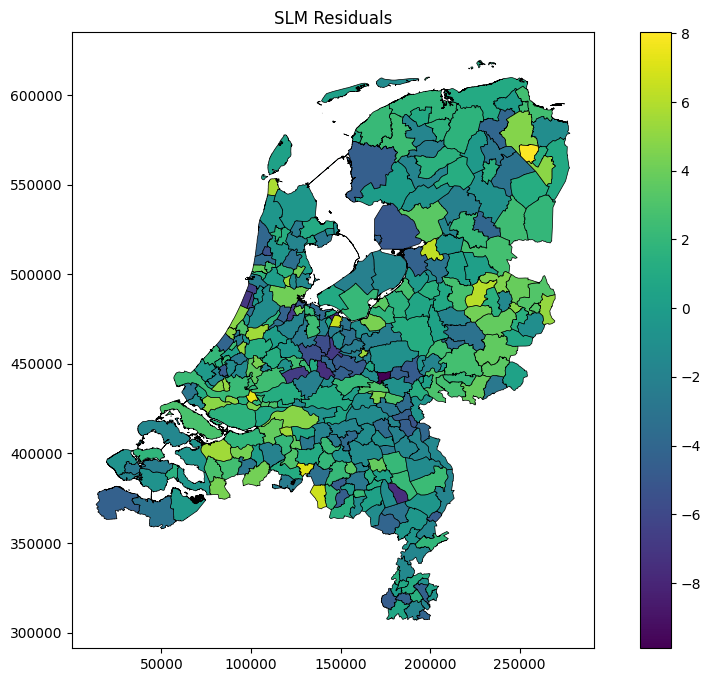

In [ ]:
gdf['slm_res'] = ols.u

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='slm_res', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5)
ax.set_title('SLM Residuals')
plt.show()

This multi-faceted approach ensures a thorough analysis of spatial patterns and associations. However, to provide a more robust analysis, consider validating the results using different spatial weight matrix configurations, and cross-validating your models to assess their predictive accuracy. Additionally, you may want to explore spatial autocorrelation measures such as Moran's I and Geary's C to further support your findings.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cfc4dc78-fd2a-4b67-8dea-b0c970af57ec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>